# Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
# Libraries to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split
# Libraries for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [4]:
pd.set_option('display.max_columns', None)

# Loading The Data

In [5]:
ls

01_EDA.ipynb             Dockerfile  requirements.txt
01_Model_building.ipynb  LICENSE     spam.csv
app.py                   model.pkl   vectorizer.pkl
data_preprocessed.csv    README.md   website/


In [6]:
# using data set without dropping dummies and duplicates
original_df = pd.read_csv("data_preprocessed.csv")

In [7]:
df = original_df.copy()

# Preprocessing

In [8]:
# checking first 5 rows
df.head()

,Unnamed: 0,target,text,num_char,num_words,num_sentence,transformed_text
0,0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [9]:
# total size of the data set
print("Number of Rows in data: ", df.shape[0])
print("Number of columns in data: ", df.shape[1])

Number of Rows in data:  5169
Number of columns in data:  7


In [10]:
df.columns

Index(['Unnamed: 0', 'target', 'text', 'num_char', 'num_words', 'num_sentence',
       'transformed_text'],
      dtype='object')

In [11]:
# droping unwanted columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [12]:
df.shape

(5169, 6)

In [13]:
df.head()

,target,text,num_char,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [14]:
df

,target,text,num_char,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5165,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5166,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5167,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [15]:
df.isnull().sum()[df.isnull().sum() > 0]

transformed_text    9
dtype: int64

In [16]:
df = df[~df['transformed_text'].isnull()]

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [18]:
# creating dependent and independent variables sets
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df["target"]

In [19]:
print("shape of x", X.shape)
print("Shape of y", y.shape)

shape of x (5160, 6708)
Shape of y (5160,)


In [20]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5164    1
5165    0
5166    0
5167    0
5168    0
Name: target, Length: 5160, dtype: int64

In [21]:
# Creating train set and test s
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [22]:
print("Shape of X_train", X_train.shape)
print("Shape of X_test",  X_test.shape)

Shape of X_train (4128, 6708)
Shape of X_test (1032, 6708)


In [23]:
print("Shape of y_train", y_train.shape)
print("Shape of y_test",  y_test.shape)

Shape of y_train (4128,)
Shape of y_test (1032,)


# Building Machine Learning Models

## Evaluation Matrixes

### confusion matrix

In [24]:

def Improved_cf_multiclass(cf_matrix):
    '''This function takes the confusion matrix as input and provides a labeled heatmap of the confusion matrix.'''
    # Defining labels
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    # Flattening the 2D array to one dimension
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    # Zipping curresponding label and value
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
    # Reshaping back to 2D array
    labels = np.asarray(labels).reshape(2, 2)

    # Creating a heatmap for the given confusion matrix with labels created
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    # Set title, x-label and y-label
    ax.set_title('Seaborn Confusion Matrix with labels\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    # Setting x-ticks and y-ticks
    ax.xaxis.set_ticklabels(['0', "1"])
    ax.yaxis.set_ticklabels(['0', "1"])
    # show the heatmap
    plt.show()

### Classification Report

In [25]:


def classification_results(Y_true, Y_pred, scoring_list, average=None):
    '''Function to evaluate our model after training using different types  evaluation metrics and show all in a dataframe '''
    # Creating a deafult dictionary
    evaluation_dict = defaultdict(list)

    for count, scoring_metric in enumerate(scoring_list):
        # Appending the scoring metric's names to the dictionary
        evaluation_dict["scoring"].append(scoring_metric.__name__)

        # For accuracy score average=None
        if count == 0 or average is None:
            metric_value = scoring_metric((Y_true), (Y_pred))
        else:
            # For other metrics average=average
            metric_value = scoring_metric((Y_true), (Y_pred), average=average)

        # Appending the value of the curresponding metric to the dictionary
        evaluation_dict["Value"].append('{:f}'.format(metric_value))

    # Creating a dataframe from the dictionary
    evaluation_df = pd.DataFrame(evaluation_dict)
    return evaluation_df

In [26]:

# Creating a list of evalation metrics
scoring_list = [accuracy_score, precision_score, recall_score, f1_score]

## Logistic Regression

In [27]:
# training the model
from sklearn.linear_model import LogisticRegression
log_reg_classifier = LogisticRegression(random_state=0)
log_reg_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [28]:
# Making prediction on our train and test dataset
log_reg_pred_train = log_reg_classifier.predict(X_train)
log_reg_pred_test = log_reg_classifier.predict(X_test)

In [29]:
# Storing train and test accuracy scores
log_reg_train_accuracy = accuracy_score(y_train, log_reg_pred_train)
log_reg_test_accuracy = accuracy_score(y_test, log_reg_pred_test)

# printing train and test accuracy scores
print("Training accuracy Score    : ", log_reg_train_accuracy)
print("Test accuracy Score : ", log_reg_test_accuracy)

# printing classification report for the performance of train and test set
print("\n", "Logistic Regression Classification Report for train dataset", "\n")
print(classification_report(y_train, log_reg_pred_train))
print("Logistic Regression Classification Report for test dataset", "\n")
print(classification_report(y_test, log_reg_pred_test))

Training accuracy Score    :  0.9617248062015504
Test accuracy Score :  0.9505813953488372

 Logistic Regression Classification Report for train dataset 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3598
           1       0.98      0.72      0.83       530

    accuracy                           0.96      4128
   macro avg       0.97      0.86      0.90      4128
weighted avg       0.96      0.96      0.96      4128

Logistic Regression Classification Report for test dataset 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       909
           1       0.96      0.61      0.75       123

    accuracy                           0.95      1032
   macro avg       0.96      0.80      0.86      1032
weighted avg       0.95      0.95      0.95      1032



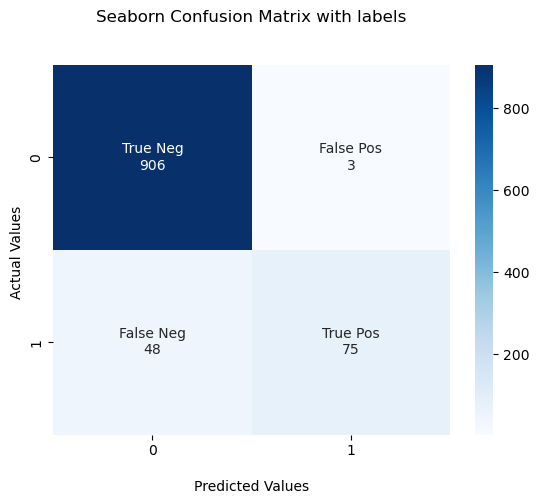

In [30]:
cm = confusion_matrix(y_test, log_reg_pred_test)
Improved_cf_multiclass(cm)

In [31]:
# using weighted precision and weighted recall because of unbalanced data set
print("Performance of Logistic Regression model on the test dataset is:", '\n')
lr_evaluation_df = classification_results(
    y_test, log_reg_pred_test, scoring_list)
lr_evaluation_df

Performance of Logistic Regression model on the test dataset is: 



,scoring,Value
0,accuracy_score,0.950581
1,precision_score,0.961538
2,recall_score,0.609756
3,f1_score,0.746269


We are considering precicion as matrix because of unbalanced data set.  As per the scenario Our focus must be on FP. Because It very important that we don't classify a non spam message into spam

## K-NN Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(
    n_neighbors=5, metric='minkowski', p=2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
# Making prediction on our train and test dataset
knn_pred_train = knn_classifier.predict(X_train)
knn_pred_test = knn_classifier.predict(X_test)

In [34]:


# Storing train and test accuracy scores
train_accuracy = accuracy_score(y_train, knn_pred_train)
test_accuracy = accuracy_score(y_test, knn_pred_test)

# printing train and test accuracy scores
print("Training accuracy Score    : ", train_accuracy)
print("Test accuracy Score : ", test_accuracy)

# printing classification report for the performance of train and test set
print("\n", "KNN Classification Report for train dataset", "\n")
print(classification_report(y_train, knn_pred_train))
print("KNN Classification Report for test dataset", "\n")
print(classification_report(y_test, knn_pred_test))

Training accuracy Score    :  0.9140019379844961
Test accuracy Score :  0.9215116279069767

 KNN Classification Report for train dataset 

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3598
           1       1.00      0.33      0.50       530

    accuracy                           0.91      4128
   macro avg       0.96      0.67      0.72      4128
weighted avg       0.92      0.91      0.89      4128

KNN Classification Report for test dataset 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       909
           1       1.00      0.34      0.51       123

    accuracy                           0.92      1032
   macro avg       0.96      0.67      0.73      1032
weighted avg       0.93      0.92      0.90      1032



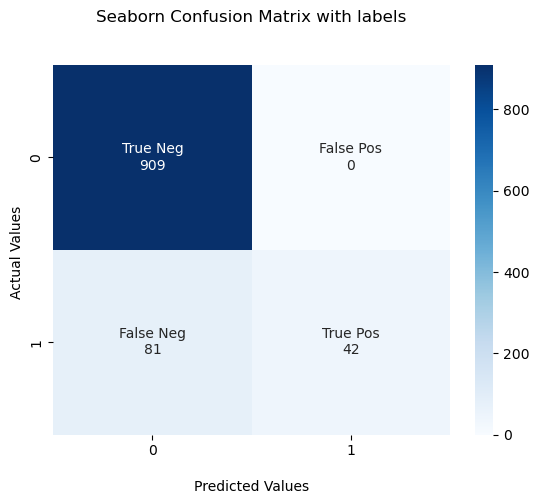

In [35]:
cm = confusion_matrix(y_test, knn_pred_test)
Improved_cf_multiclass(cm)

In [36]:
# using weighted precision and weighted recall because of unbalanced data set
print("Performance of KNN model on the test dataset is:", '\n')
knn_evaluation_df = classification_results(
    y_test, knn_pred_test, scoring_list)
knn_evaluation_df

Performance of KNN model on the test dataset is: 



,scoring,Value
0,accuracy_score,0.921512
1,precision_score,1.000000
2,recall_score,0.341463
3,f1_score,0.509091


## Support Vector Machine (SVM)

In [37]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state=0)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [38]:
# Making prediction on our train and test dataset
svm_pred_train = svm_classifier.predict(X_train)
svm_pred_test = svm_classifier.predict(X_test)

In [39]:

# Storing train and test accuracy scores
train_accuracy = accuracy_score(y_train, svm_pred_train)
test_accuracy = accuracy_score(y_test, svm_pred_test)

# printing train and test accuracy scores
print("Training accuracy Score    : ", train_accuracy)
print("Test accuracy Score : ", test_accuracy)

# printing classification report for the performance of train and test set
print("\n", "SVM Classification Report for train dataset", "\n")
print(classification_report(y_train, svm_pred_train))
print("SVM Classification Report for test dataset", "\n")
print(classification_report(y_test, svm_pred_test))

Training accuracy Score    :  0.9946705426356589
Test accuracy Score :  0.9738372093023255

 SVM Classification Report for train dataset 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3598
           1       1.00      0.96      0.98       530

    accuracy                           0.99      4128
   macro avg       1.00      0.98      0.99      4128
weighted avg       0.99      0.99      0.99      4128

SVM Classification Report for test dataset 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       909
           1       0.95      0.82      0.88       123

    accuracy                           0.97      1032
   macro avg       0.96      0.91      0.93      1032
weighted avg       0.97      0.97      0.97      1032



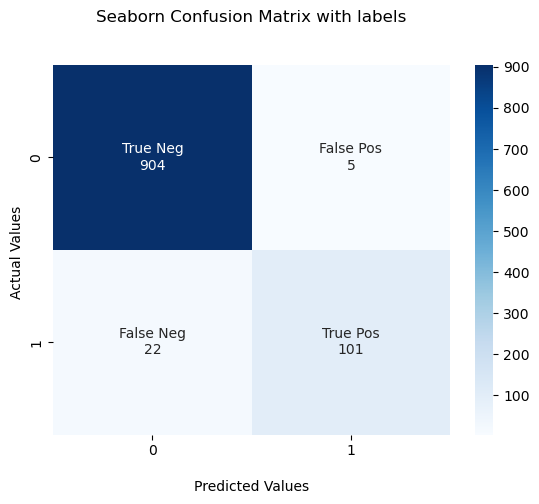

In [40]:
cm = confusion_matrix(y_test, svm_pred_test)
Improved_cf_multiclass(cm)

In [41]:
# using weighted precision and weighted recall because of unbalanced data set
print("Performance of SVM model on the test dataset is:", '\n')
svm_evaluation_df = classification_results(
    y_test, svm_pred_test, scoring_list)
svm_evaluation_df

Performance of SVM model on the test dataset is: 



,scoring,Value
0,accuracy_score,0.973837
1,precision_score,0.952830
2,recall_score,0.821138
3,f1_score,0.882096


## Kernal Support Vector Machine (K-SVM)

In [42]:
from sklearn.svm import SVC
k_svm_classifier = SVC(kernel='rbf', random_state=0)
k_svm_classifier.fit(X_train, y_train)

SVC(random_state=0)

In [43]:
# Making prediction on our train and test dataset
k_svm_pred_train = k_svm_classifier.predict(X_train)
k_svm_pred_test = k_svm_classifier.predict(X_test)

In [44]:

# Storing train and test accuracy scores
k_svm_train_accuracy = accuracy_score(y_train, k_svm_pred_train)
k_svm_test_accuracy = accuracy_score(y_test, k_svm_pred_test)

# printing train and test accuracy scores
print("Training accuracy Score    : ", train_accuracy)
print("Test accuracy Score : ", test_accuracy)

# printing classification report for the performance of train and test set
print("\n", "Kernal-SVM Classification Report for train dataset", "\n")
print(classification_report(y_train, k_svm_pred_train))
print("Kernal-SVM Classification Report for test dataset", "\n")
print(classification_report(y_test, k_svm_pred_test))

Training accuracy Score    :  0.9946705426356589
Test accuracy Score :  0.9738372093023255

 Kernal-SVM Classification Report for train dataset 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3598
           1       1.00      0.98      0.99       530

    accuracy                           1.00      4128
   macro avg       1.00      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128

Kernal-SVM Classification Report for test dataset 

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       909
           1       0.99      0.79      0.88       123

    accuracy                           0.97      1032
   macro avg       0.98      0.89      0.93      1032
weighted avg       0.97      0.97      0.97      1032



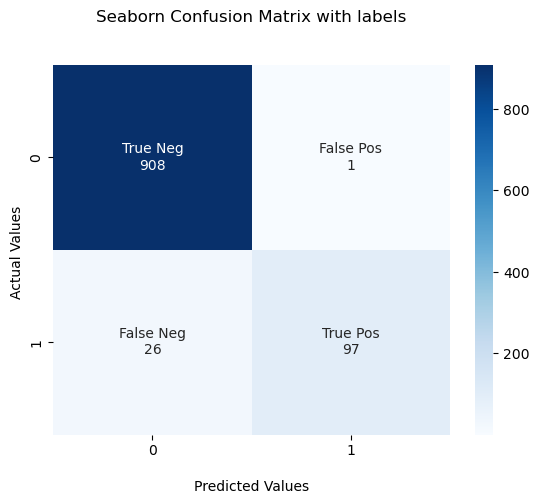

In [45]:
cm = confusion_matrix(y_test, k_svm_pred_test)
Improved_cf_multiclass(cm)

In [46]:
# using weighted precision and weighted recall because of unbalanced data set
print("Performance of Kernal-SVM model on the test dataset is:", '\n')
k_svm_evaluation_df = classification_results(
    y_test, k_svm_pred_test, scoring_list)
k_svm_evaluation_df

Performance of Kernal-SVM model on the test dataset is: 



,scoring,Value
0,accuracy_score,0.973837
1,precision_score,0.989796
2,recall_score,0.788618
3,f1_score,0.877828


## NAIVE BAYES

In [47]:
from sklearn.naive_bayes import MultinomialNB
# building pipe line for naive bayes

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [48]:
# Making prediction on our train and test dataset
nb_pred_train = nb_classifier.predict(X_train)
nb_test_pred = nb_classifier.predict(X_test)

In [49]:

# Storing train and test accuracy scores
train_accuracy = accuracy_score(y_train, nb_pred_train)
test_accuracy = accuracy_score(y_test, nb_test_pred)

# printing train and test accuracy scores
print("Training accuracy Score    : ", train_accuracy)
print("Test accuracy Score : ", test_accuracy)

# printing classification report for the performance of train and test set
print("\n", "Naive Bayes Classification Report for train dataset", "\n")
print(classification_report(y_train, nb_pred_train))
print("Naive Bayes Classification Report for test dataset", "\n")
print(classification_report(y_test, nb_test_pred))

Training accuracy Score    :  0.9733527131782945
Test accuracy Score :  0.9593023255813954

 Naive Bayes Classification Report for train dataset 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3598
           1       1.00      0.79      0.88       530

    accuracy                           0.97      4128
   macro avg       0.99      0.90      0.93      4128
weighted avg       0.97      0.97      0.97      4128

Naive Bayes Classification Report for test dataset 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       909
           1       1.00      0.66      0.79       123

    accuracy                           0.96      1032
   macro avg       0.98      0.83      0.89      1032
weighted avg       0.96      0.96      0.96      1032



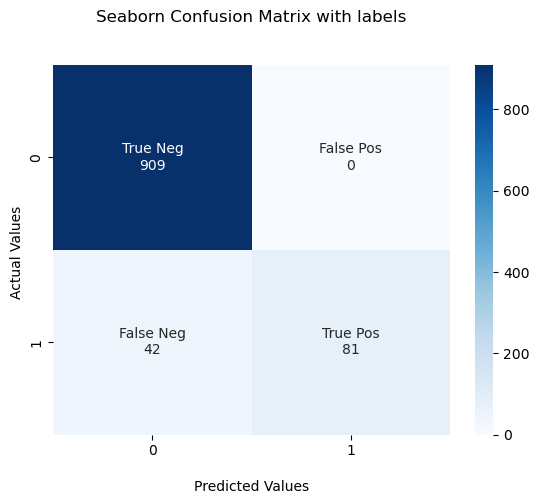

In [50]:
cm = confusion_matrix(y_test, nb_test_pred)
Improved_cf_multiclass(cm)

In [51]:
# using weighted precision and weighted recall because of unbalanced data set
print("Performance of Naive Bayes model on the test dataset is:", '\n')
nb_evaluation_df = classification_results(
    y_test, nb_test_pred, scoring_list)
nb_evaluation_df

Performance of Naive Bayes model on the test dataset is: 



,scoring,Value
0,accuracy_score,0.959302
1,precision_score,1.000000
2,recall_score,0.658537
3,f1_score,0.794118


## DECISION Trees

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(
    criterion='gini', random_state=0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [53]:
# Making prediction on our train and test dataset
dt_pred_train = dt_classifier.predict(X_train)
dt_test_pred = dt_classifier.predict(X_test)

In [54]:


# Storing train and test accuracy scores
train_accuracy = accuracy_score(y_train, dt_pred_train)
test_accuracy = accuracy_score(y_test, dt_test_pred)

# printing train and test accuracy scores
print("Training accuracy Score    : ", train_accuracy)
print("Test accuracy Score : ", test_accuracy)

# printing classification report for the performance of train and test set
print("\n", "Decision Tree Classification Report for train dataset", "\n")
print(classification_report(y_train, dt_pred_train))
print("Decision Tree Classification Report for test dataset", "\n")
print(classification_report(y_test, dt_test_pred))

Training accuracy Score    :  1.0
Test accuracy Score :  0.9496124031007752

 Decision Tree Classification Report for train dataset 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3598
           1       1.00      1.00      1.00       530

    accuracy                           1.00      4128
   macro avg       1.00      1.00      1.00      4128
weighted avg       1.00      1.00      1.00      4128

Decision Tree Classification Report for test dataset 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       909
           1       0.78      0.81      0.79       123

    accuracy                           0.95      1032
   macro avg       0.87      0.89      0.88      1032
weighted avg       0.95      0.95      0.95      1032



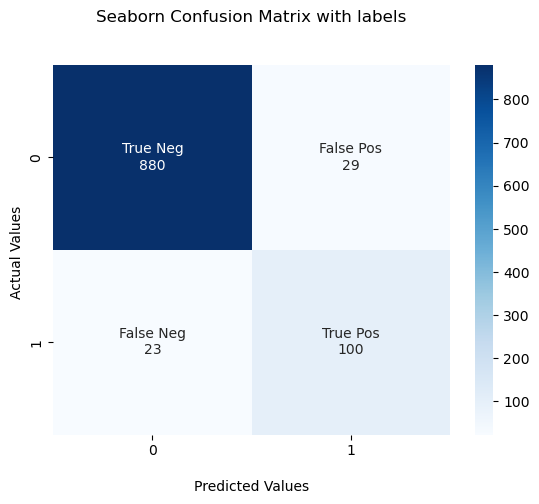

In [55]:
cm = confusion_matrix(y_test, dt_test_pred)
Improved_cf_multiclass(cm)

In [56]:
# using weighted precision and weighted recall because of unbalanced data set
print("Performance of Decision Tree model on the test dataset is:", '\n')
dt_evaluation_df = classification_results(
    y_test, dt_test_pred, scoring_list)
dt_evaluation_df

Performance of Decision Tree model on the test dataset is: 



,scoring,Value
0,accuracy_score,0.949612
1,precision_score,0.775194
2,recall_score,0.813008
3,f1_score,0.793651


## Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(
    n_estimators=10, criterion='gini', random_state=0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [58]:
# Making prediction on our train and test dataset
rf_pred_train = rf_classifier.predict(X_train)
rf_pred_test = rf_classifier.predict(X_test)

In [59]:


# Storing train and test accuracy scores
train_accuracy = accuracy_score(y_train, rf_pred_train)
test_accuracy = accuracy_score(y_test, rf_pred_test)

# printing train and test accuracy scores
print("Training accuracy Score    : ", train_accuracy)
print("Test accuracy Score : ", test_accuracy)

# printing classification report for the performance of train and test set
print("\n", "Random Forest Classification Report for train dataset", "\n")
print(classification_report(y_train, rf_pred_train))
print("Random Classification Report for test dataset", "\n")
print(classification_report(y_test, rf_pred_test))

Training accuracy Score    :  0.9953972868217055
Test accuracy Score :  0.9641472868217055

 Random Forest Classification Report for train dataset 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3598
           1       1.00      0.96      0.98       530

    accuracy                           1.00      4128
   macro avg       1.00      0.98      0.99      4128
weighted avg       1.00      1.00      1.00      4128

Random Classification Report for test dataset 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       909
           1       0.98      0.72      0.83       123

    accuracy                           0.96      1032
   macro avg       0.97      0.86      0.90      1032
weighted avg       0.96      0.96      0.96      1032



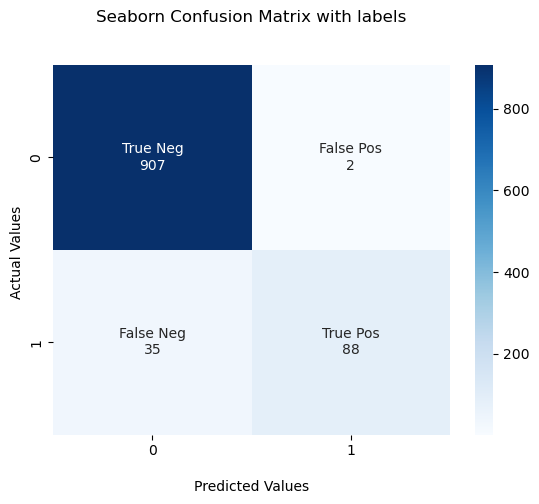

In [60]:
cm = confusion_matrix(y_test, rf_pred_test)
Improved_cf_multiclass(cm)

In [61]:
# using weighted precision and weighted recall because of unbalanced data set
print("Performance of Random Forest model on the test dataset is:", '\n')
rf_evaluation_df = classification_results(
    y_test, rf_pred_test, scoring_list)
rf_evaluation_df

Performance of Random Forest model on the test dataset is: 



,scoring,Value
0,accuracy_score,0.964147
1,precision_score,0.977778
2,recall_score,0.715447
3,f1_score,0.826291


## Evaluation

In [62]:
def evaluate_all_models(evaluation_dfs, model_names):
    '''Function to create a dataframe containing the scores of different evaluation metrics
      for different models'''

    # Creating an empty list to store the transposed evaluation dfs
    transposed_evaluation_df = []

    # Transposing all the evaluation df that we have created till now and saving all of them in transposed_evaluation_df
    for e_df in evaluation_dfs:
        e_df = e_df.set_index("scoring")
        e_df.index.names = [None]
        e_df = e_df.transpose()
        transposed_evaluation_df.append(e_df)

    # Concatenating all the individual transposed evaluation df into single df
    all_model_evaluation_df = pd.concat(transposed_evaluation_df, axis=0)
    all_model_evaluation_df.insert(0, "Model_Name", model_names)
    all_model_evaluation_df.reset_index(drop=True, inplace=True)
    all_model_evaluation_df.sort_values(
        by='accuracy_score', ascending=False, inplace=True)

    return all_model_evaluation_df

In [63]:
# Creating a list of all the model names that we have evaluated till now
model_names = ["Logistic Regression", "KNN", "SVM", "Kernal-SVM", "Multi Nomial Naive Bayes",
               "Decision Tree", "Random Forest"]

# Creates a list of all evaluations dataframe made for different models
evaluation_df = [lr_evaluation_df, knn_evaluation_df,
                 svm_evaluation_df, k_svm_evaluation_df, nb_evaluation_df, dt_evaluation_df, rf_evaluation_df]

In [64]:
# Calling the function 'evaluate_all_models' to get final comparison dataframe based on different evaluation metrics for all the models
all_model_df = evaluate_all_models(evaluation_df, model_names)

In [65]:
# Converting the datatype of scores from object to float
all_model_df[['accuracy_score',	'precision_score',	'recall_score',	'f1_score']] = all_model_df[['accuracy_score',
                                                                                                'precision_score', 'recall_score',	'f1_score']].apply(lambda x: x.astype(str).astype(float))
print("Comparison dataframe for all the models based on different evaluation metrics on the test dataset:", "\n")
# Scores are rounded up to 2 decimals
all_model_df.reset_index(inplace=True, drop=True)
all_model_df.sort_values(by="precision_score", ascending=False).round(3)

Comparison dataframe for all the models based on different evaluation metrics on the test dataset: 



,Model_Name,accuracy_score,precision_score,recall_score,f1_score
3,Multi Nomial Naive Bayes,0.959,1.000,0.659,0.794
6,KNN,0.922,1.000,0.341,0.509
1,Kernal-SVM,0.974,0.990,0.789,0.878
2,Random Forest,0.964,0.978,0.715,0.826
4,Logistic Regression,0.951,0.962,0.610,0.746
0,SVM,0.974,0.953,0.821,0.882
5,Decision Tree,0.950,0.775,0.813,0.794


In [66]:
perfomance_df = all_model_df.melt(id_vars="Model_Name")

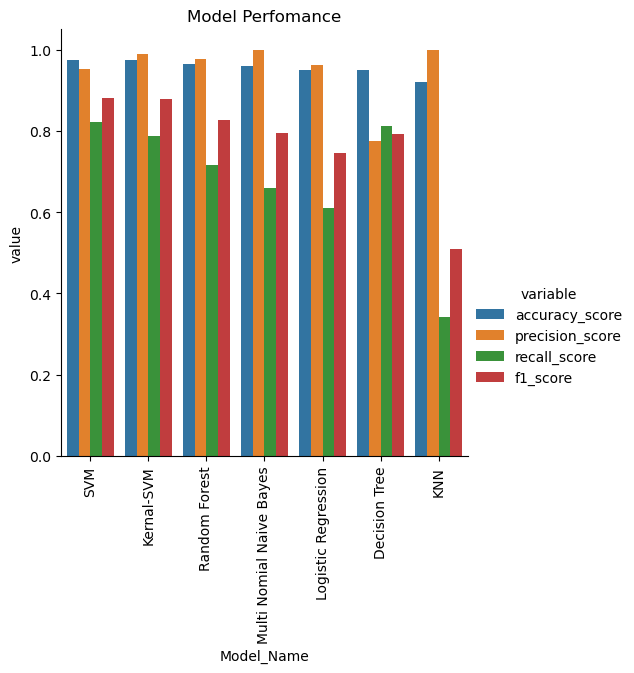

In [67]:

sns.catplot(data=perfomance_df, x="Model_Name", y="value",
            hue="variable", kind='bar', height=5)
plt.xticks(rotation="vertical")
plt.title("Model Perfomance")
plt.show()

We are considering Precision as matrix because of imbalanced data set.Based On that, We are selecting Multi Nomial Naive Bayes as the best model also it also has high accuracy compared to KNN

Our first model was not perfoming well in deployment so trying to do Hyper parameter turning

# Cross Validation And Hyper Parameter Tuning

## Applying k-Fold Cross Validation

In [74]:
from sklearn.metrics import make_scorer, precision_score
# Define the scorer (precision)
scorer = make_scorer(precision_score, average='binary')

In [75]:
from sklearn.model_selection import cross_val_score
precisions = cross_val_score(
    estimator=nb_classifier, X=X_train, y=y_train, cv=10, scoring=scorer)
print("Precision: {:.2f} %".format(precisions.mean()*100))
print("Standard Deviation: {:.2f} %".format(precisions.std()*100))

Precision: 100.00 %
Standard Deviation: 0.00 %


## Applying Grid Search to find the best model and the best parameters

In [78]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [82]:
X = df["transformed_text"]
y = df["target"]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [84]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [86]:
y_pred_nb_pipe = pipeline.predict(X_test)

In [87]:
from sklearn.model_selection import GridSearchCV
# Creating parameter dictionary for hyperparameter tuning

param_grid = {
    'tfidf__max_features': [1000, 2000, 3000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'nb__alpha': [0.1, 0.5, 1.0]
}
# Performing cross validation and hyperparameter tuning
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='precision',
                           cv=10,
                           n_jobs=-1)

# Fitting the model on the train dataset
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'nb__alpha': [0.1, 0.5, 1.0],
                         'tfidf__max_features': [1000, 2000, 3000],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='precision')

In [88]:
# Making prediction on our train and test dataset
nb_grid_pred_train = grid_search.predict(X_train)
nb_grid_pred_test = grid_search.predict(X_test)

In [90]:
# Storing train and test accuracy scores
nb_grid_train_accuracy = accuracy_score(y_train, nb_grid_pred_train)
nb_grid_test_accuracy = accuracy_score(y_test, nb_grid_pred_test)


# Obtaining best parameters
best_parameters = grid_search.best_params_
print("Best hyperparameter for the random forest Model are:", best_parameters)
best_accuracy = grid_search.best_score_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))


# printing train and test accuracy scores
print("Training accuracy Score   : ", grid_search.score(X_train, y_train))
print("Test accuracy Score : ", nb_grid_test_accuracy)


# printing classification report for the performance of train and test set
print("\n", "Naive Bayes model Grid Model-Classification Report for train dataset", "\n")
print(classification_report(nb_grid_pred_train, y_train))
print("Naive Bayes Grid Model-Classification Report for test dataset", "\n")
print(classification_report(nb_grid_pred_test, y_test))

Best hyperparameter for the random forest Model are: {'nb__alpha': 1.0, 'tfidf__max_features': 3000, 'tfidf__ngram_range': (1, 2)}
Best Accuracy: 99.24 %
Training accuracy Score   :  0.9956043956043956
Test accuracy Score :  0.9728682170542635

 Naive Bayes model Grid Model-Classification Report for train dataset 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3673
           1       0.85      1.00      0.92       455

    accuracy                           0.98      4128
   macro avg       0.93      0.99      0.95      4128
weighted avg       0.98      0.98      0.98      4128

Naive Bayes Grid Model-Classification Report for test dataset 

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       937
           1       0.77      1.00      0.87        95

    accuracy                           0.97      1032
   macro avg       0.89      0.99      0.93      1032
weighted avg       0

In [91]:
# Evaluating performance of prediction on the test data using different evaluation metrics
grid_evaluation_df = classification_results(
    y_test, nb_grid_pred_test, scoring_list)
print("Performance of Naive Bayes Grid Model on the test dataset is:", '\n')
grid_evaluation_df

Performance of Naive Bayes Grid Model on the test dataset is: 



,scoring,Value
0,accuracy_score,0.972868
1,precision_score,1.000000
2,recall_score,0.772358
3,f1_score,0.871560


# Confusion matrix for best model.


Confusion matrix for the best model:


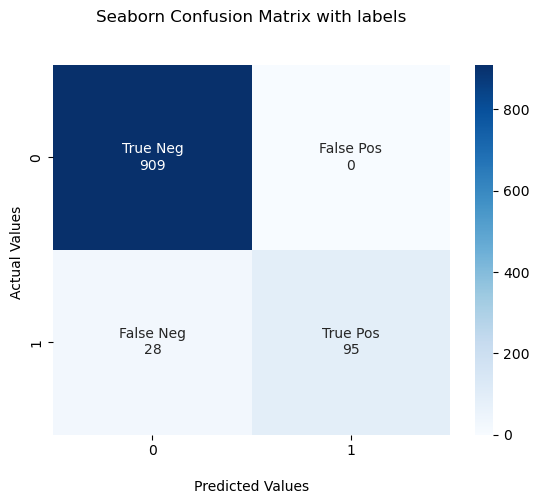

In [92]:
# Confusion matrix for the best model:LinearSVC Grid Model
print("Confusion matrix for the best model:")
Improved_cf_multiclass(confusion_matrix(y_test, nb_grid_pred_test))

In [93]:
# save model
# Save the model to a file
import pickle
with open('pipeline.pkl', 'wb') as f:
    pickle.dump(grid_search.best_estimator_, f)

# Load the model from a file
with open('pipeline.pkl', 'rb') as f:
    model = pickle.load(f)

In [69]:
# import pickle
# pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
# pickle.dump(nb_classifier, open('model.pkl', 'wb'))

In [70]:
# with open('model.pkl', 'rb') as file:
#     model = pickle.load(file)